## <span style="color:darkblue"> Problem Set 2: Introduction to Data (continued)

Stat140-02: Introduction to the Ideas and Applications of Statistics 

Due: Friday, Feb 16 @11am

**Problem set policies:** Please provide concise, clear answers for each question. Note that only writing the result of a calculation (e.g., "SD = 3.3") without explanation is not sufficient. For problems involving `R`, include the code in your solution, along with any plots.
		
Each problem set is due by 11:00am on the due date; please submit your problem set via gyrd
		
*You are encouraged to discuss problems with other students (and, of course, with the course head and the TAs), but you must write your final answer in your own words. Solutions prepared "in committee" are not acceptable. If you do collaborate with classmates on a problem, please list your collaborators on your solution.*

#### Background information 

In the United States, individuals with developmental disabilities typically receive services and support from state governments. The State of California allocates funds to developmentally-disabled residents through the California Department of Developmental Services (DDS); individuals receiving DDS funds are referred to as 'consumers'. The dataset \texttt{dds.discr} represents a sample of 1,000 DDS consumers (out of a total population of approximately 250,000), and includes information about age, gender, ethnicity, and the amount of financial support per consumer provided by the DDS. The dataset is available in the \texttt{oibiostat} package.

A team of researchers examined the mean annual expenditure on consumers by ethnicity, and found that the mean annual expenditures on Hispanic consumers was approximately one-third of the mean expenditures on White non-Hispanic consumers. As a result, an allegation of ethnic discrimination was brought against the California DDS.

Does this finding represent sufficient evidence of ethnic discrimination, or might there be more to the story? This lab provides a walkthrough to conducting an exploratory analysis that not only investigates the relationship between two variables of interest, but also considers whether other variables might be influencing that relationship.

#### Problem 1: Distributions of single variables

To begin understanding a dataset and developing a sense of context, start by examining the distributions of single variables. To load the data into R and look at the first six records, use the following code:

In [2]:
require(oibiostat)
data("dds.discr")
head(dds.discr)

id,age.cohort,age,gender,expenditures,ethnicity
10210,13-17,17,Female,2113,White not Hispanic
10409,22-50,37,Male,41924,White not Hispanic
10486,0-5,3,Male,1454,Hispanic
10538,18-21,19,Female,6400,Hispanic
10568,13-17,13,Male,4412,White not Hispanic
10690,13-17,15,Female,4566,Hispanic


Using appropriate numerical and graphical summaries, answer the following questions.

a) Describe the distribution of annual expenditures. For most consumers, is the amount of financial support provided by the DDS relatively high or low?

#### Solution

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


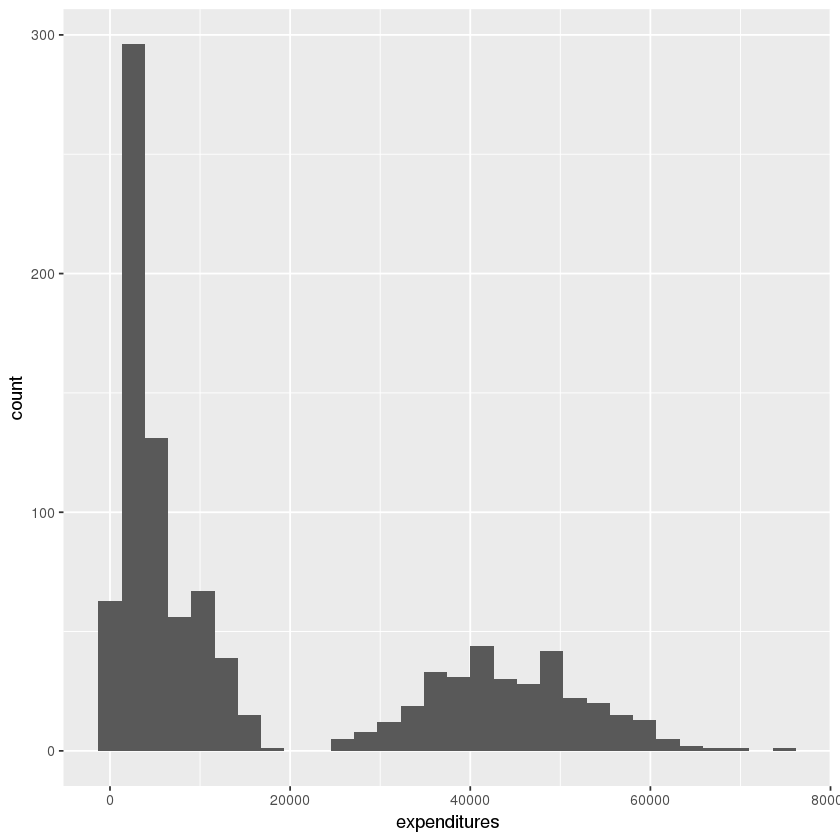

In [5]:
require(ggplot2)
ggplot(data=dds.discr,aes(expenditures)) +
    geom_histogram()

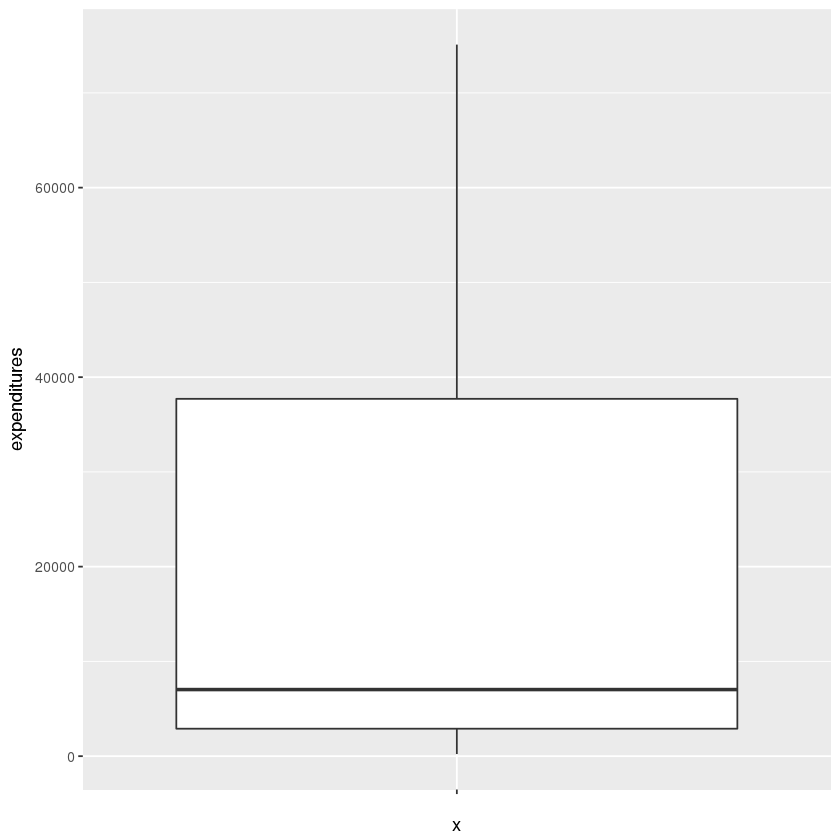

In [8]:
ggplot(data=dds.discr,aes(x="", y=expenditures)) +
    geom_boxplot()

In [6]:
require(dplyr)
dds.discr %>% 
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

min,max,q1,q3,mean,median
222,75098,2898.75,37712.75,18065.79,7026


The distribution of annual expenditures exhibits right skew, indicating that for a majority of consumers, expenditures are relatively low; most are within the $ \$0-\$5,000$ range. There are some consumers for which expenditures are much higher, such as within the $\$60,000-\$80,000$ range. The quartiles for expenditures are \$2,899, \$7,026, and \$37,710.

b) The variable `age` directly records a consumer's age; in the `age.cohort` variable, consumers are assigned to one of six age cohorts. Describe the distribution of age in this sample of consumers using visualizations and numerical summaries based on both `age` and `age.cohort`. Do consumers tend to be older or younger?
    
The cohorts are indicative of particular life phases. In the first three cohorts, consumers are still living with their parents as they move through preschool age, elementary/middle school age, and high school age. In the 18-21 cohort, consumers are transitioning from their parents' homes to living on their own or in supportive group homes. From ages 22-50, individuals are mostly no longer living with their parents but may still receive some support from family. In the 51+ cohort, consumers often have no living parents and typically require the most amount of support. 

#### Solution:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


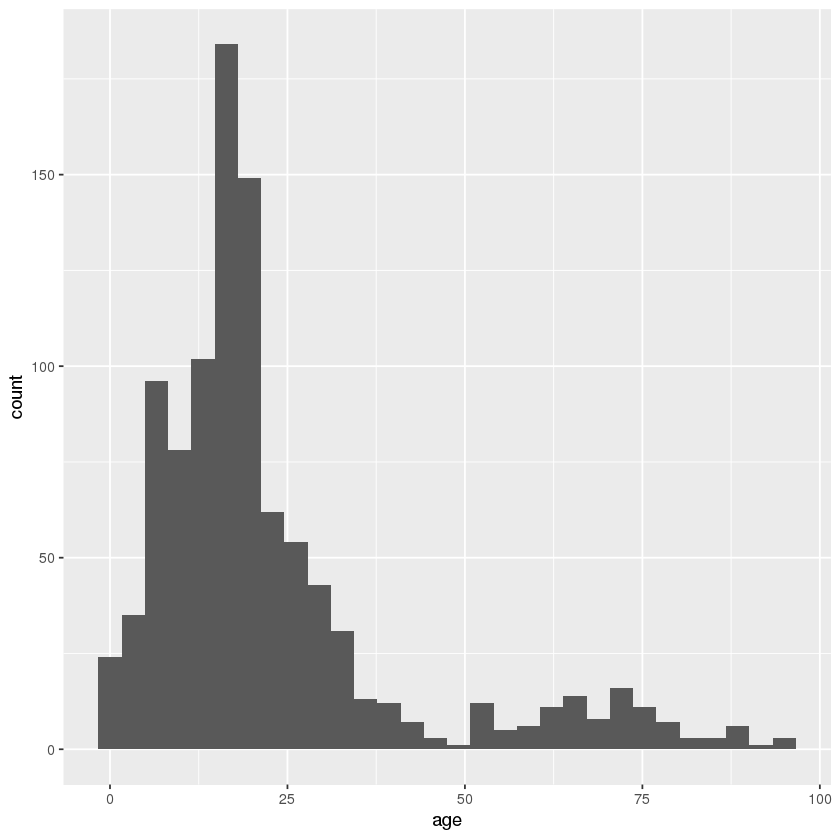

In [9]:
ggplot(data=dds.discr,aes(age)) +
    geom_histogram()

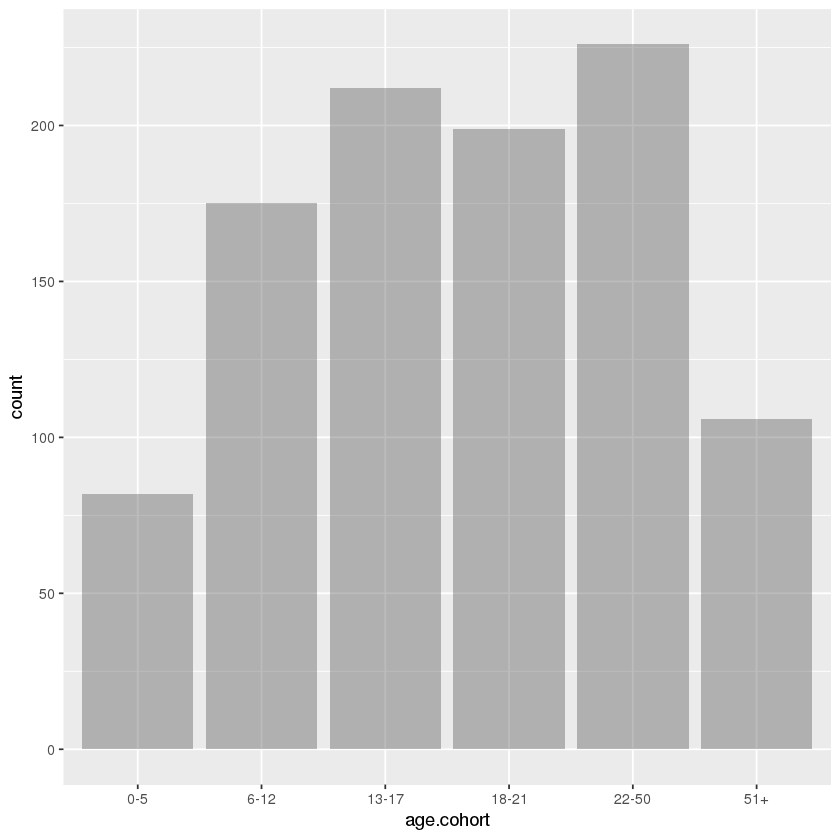

In [10]:
ggplot(data=dds.discr,aes(age.cohort)) +
    geom_bar(alpha=.4)

In [11]:
dds.discr %>% 
    summarize(min=min(age), max=max(age), q1=quantile(age,p=.25), q3=quantile(age,p=.75),
             mean=mean(age),median=median(age))

min,max,q1,q3,mean,median
0,95,12,26,22.8,18


In [12]:
dds.discr %>%
    count(age.cohort)

age.cohort,n
0-5,82
6-12,175
13-17,212
18-21,199
22-50,226
51+,106


As indicated in the histogram, there is right-skewing; most consumers are younger than 30 years old. The median age is 18 years. There are approximately 200 individuals in each of the middle four cohorts, and about 100 individuals in the other two cohorts.

c) Is there an equal representation of ethnic groups in this sample of consumers?

#### Solution:

In [13]:
dds.discr %>%
    count(ethnicity)

ethnicity,n
American Indian,4
Asian,129
Black,59
Hispanic,376
Multi Race,26
Native Hawaiian,3
Other,2
White not Hispanic,401


In [18]:
dds.discr %>%
  group_by(ethnicity) %>%
  summarise (n = n()) %>%
  mutate(freq = n / sum(n))

ethnicity,n,freq
American Indian,4,0.004
Asian,129,0.129
Black,59,0.059
Hispanic,376,0.376
Multi Race,26,0.026
Native Hawaiian,3,0.003
Other,2,0.002
White not Hispanic,401,0.401


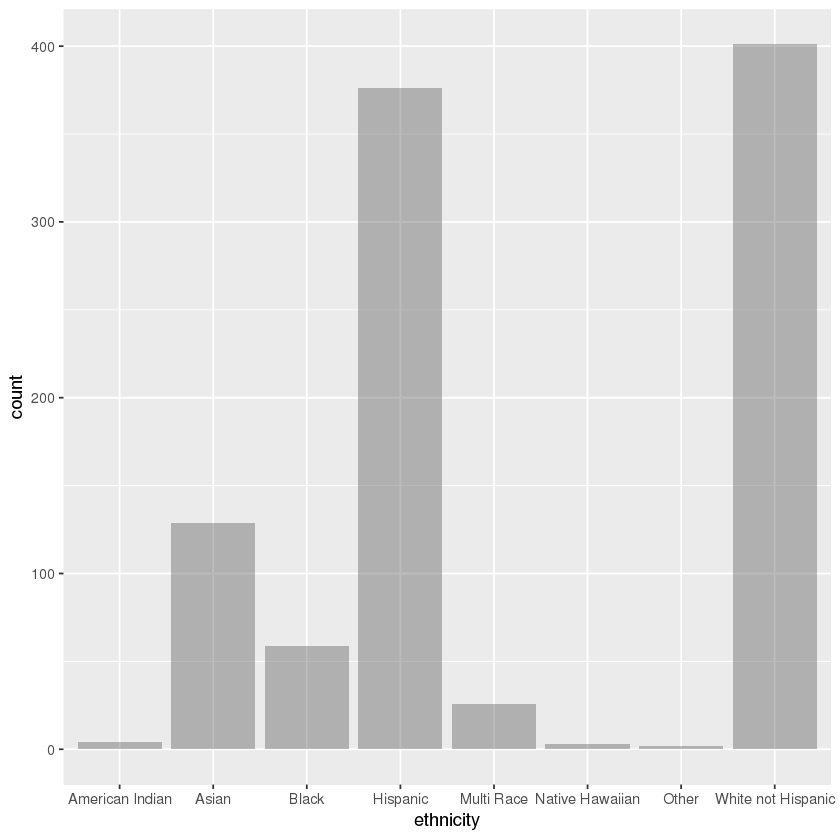

In [14]:
ggplot(data=dds.discr,aes(ethnicity)) +
    geom_bar(alpha=.4)

There are eight ethnic groups represented in the data, however there is not equal representation. The two largest groups, Hispanics and White non-Hispanics, together represent about 80% of the consumers.

d) Does gender appear to be balanced in this sample of consumers?

#### Solution:

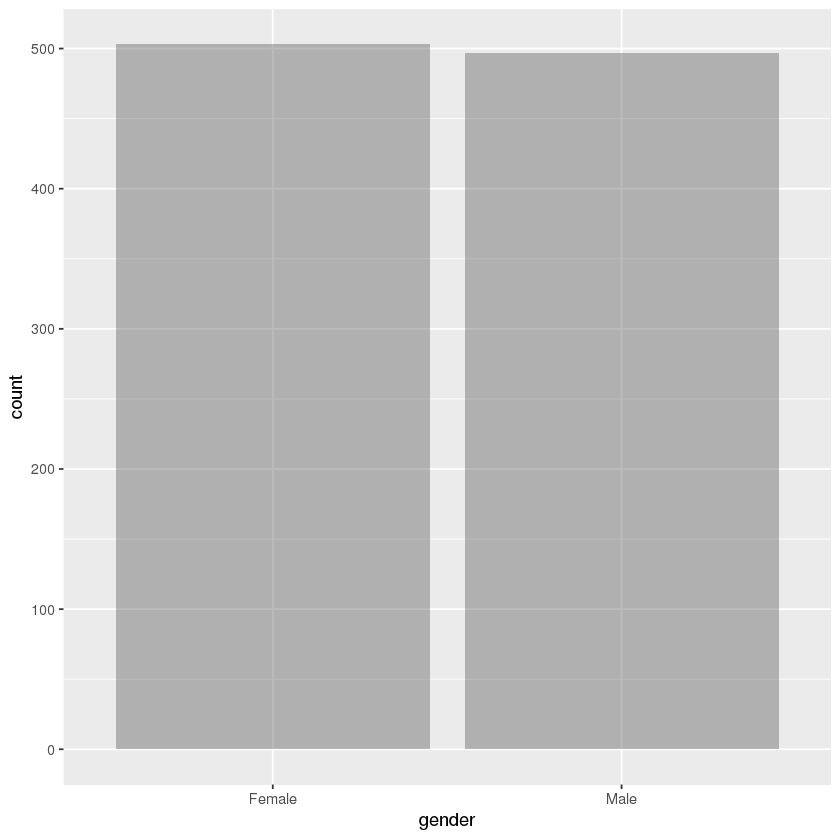

In [20]:
ggplot(data=dds.discr,aes(gender)) +
    geom_bar(alpha=.4)

In [21]:
dds.discr %>%
    count(gender)

gender,n
Female,503
Male,497


Yes, approximately half the individuals are female and half are male.

#### Problem 2: Relationships between two variables

After examining variables individually, explore how variables are related to each other. It is often useful to start by investigating the relationships between two variables, particularly between the primary response variable of interest and the exploratory variables. For this case study, the response variable is `expenditures`, the amount of funds the California DDS allocates annually to each consumer.



a) How do annual expenditures vary by age? Is there a large amount of variation in expenditures between age cohorts? Use the `age.cohort` variable. 


#### Solution:

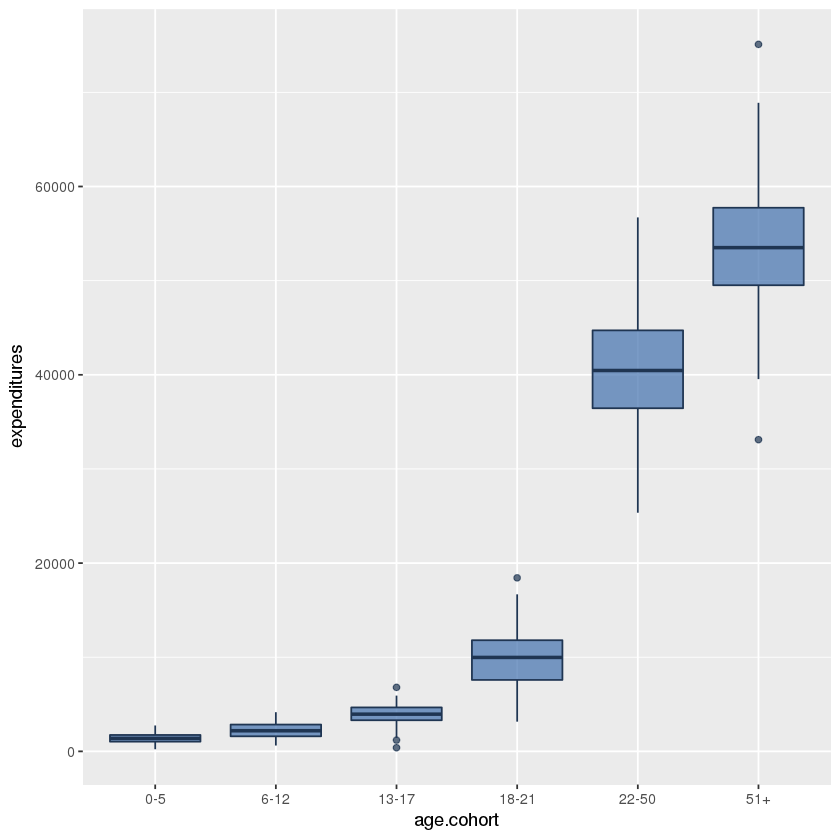

In [24]:
ggplot(data=dds.discr,aes(x=age.cohort, y=expenditures))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

In [42]:
dds.discr %>% 
    group_by(age.cohort) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

age.cohort,min,max,q1,q3,mean,median
0-5,222,2750,1034.25,1739.25,1415.280,1380.5
6-12,620,4163,1601.50,2846.50,2226.863,2191.0
13-17,386,6798,3306.50,4665.50,3922.613,3952.0
18-21,3153,18435,7588.00,11806.50,9888.538,9979.0
22-50,25348,56716,36447.25,44720.75,40209.283,40455.5
51+,33110,75098,49515.00,57745.50,53521.896,53509.0


There is a clear upward trend in expenditures as age increases; older individuals tend to receive more DDS funds. For the first three age cohorts, average expenditures ranges between \$1,400 to \$10,000. Average expenditures in the oldest two cohorts, respectively, are about \$40,000 and \$53,500. Some of the observed variation in expenditures can be attributed to the fact that the dataset includes a wide range of ages. If the data included only individuals from one age cohort, such as the 18-21 year cohort, the distribution would be less variable, and range between \$3,000 and \$20,000 rather than \$0 and \$75,000.
The upward trend reflects the underlying context of the data. The purpose of providing funds to developmentally disabled individuals is to help them maintain a quality of life similar to those without disabilities; as individuals age, it is expected that their financial needs will increase.

b) Do annual expenditures seem to vary by gender?

#### Solution:

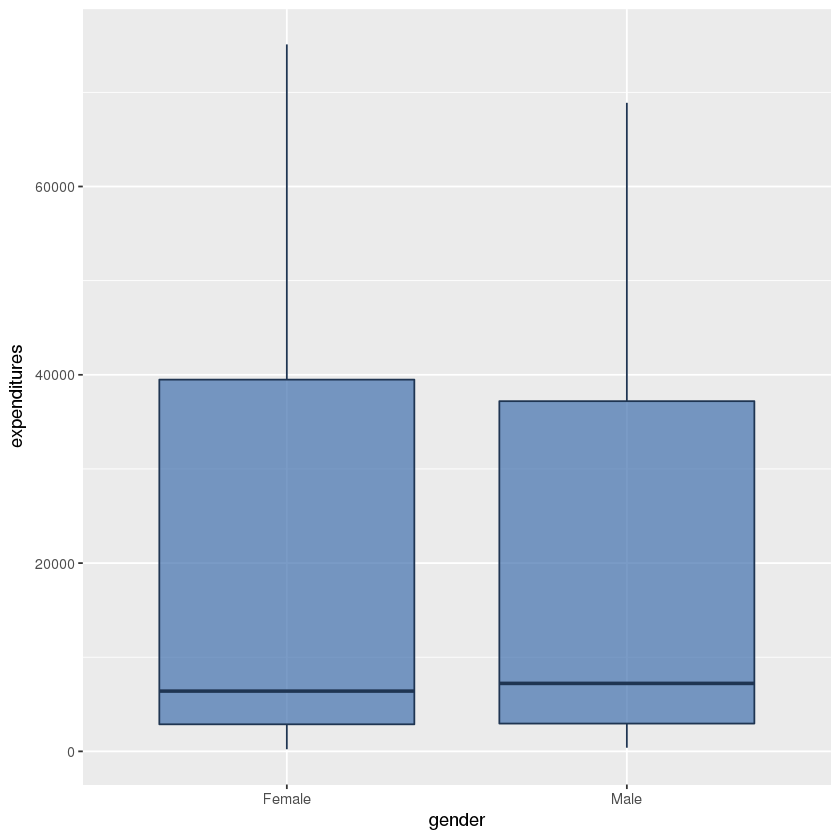

In [26]:
ggplot(data=dds.discr,aes(x=gender, y=expenditures))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

In [41]:
dds.discr %>% 
    group_by(gender) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

gender,min,max,q1,q3,mean,median
Female,222,75098,2872.5,39487.5,18129.61,6400
Male,386,68890,2954.0,37201.0,18001.20,7219


No, the distribution of expenditures within males and females is very similar; both are right skewed, with approximately equal median and interquartile range.

c) How does the distribution of expenditures vary by ethnic group? Does there seem to be a difference in the amount of funding that a person receives, on average, between different ethnicities?



#### Solution:

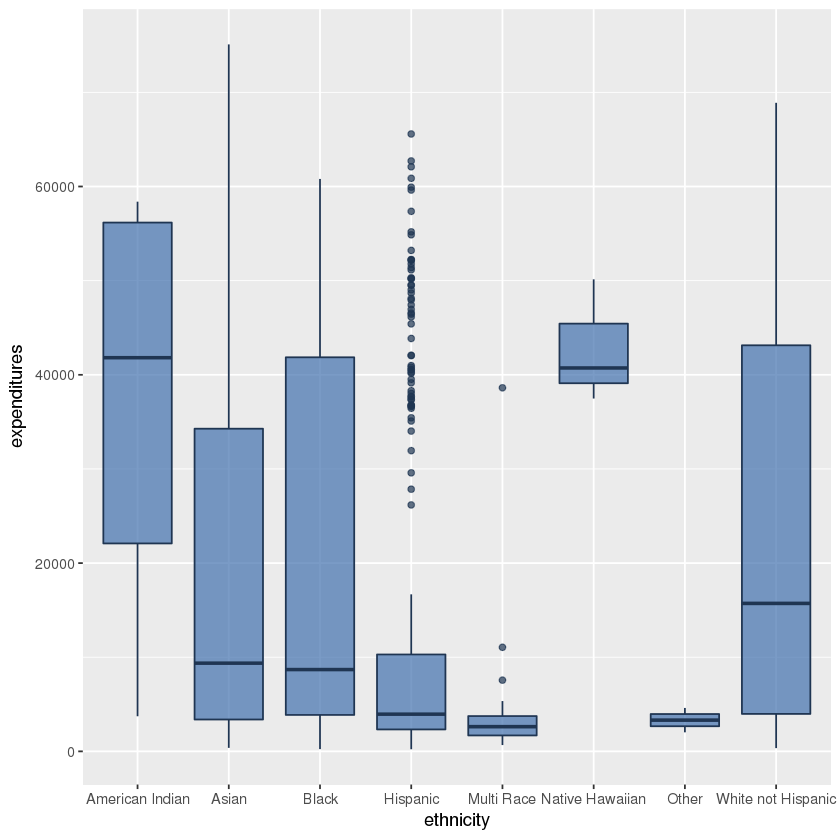

In [39]:
ggplot(data=dds.discr,aes(x=ethnicity, y=expenditures))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

In [40]:
dds.discr %>% 
    group_by(ethnicity) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

ethnicity,min,max,q1,q3,mean,median
American Indian,3726,58392,22085.25,56170.50,36438.250,41817.5
Asian,374,75098,3382.00,34274.00,18392.372,9369.0
Black,240,60808,3870.00,41857.00,20884.593,8687.0
Hispanic,222,65581,2331.25,10292.50,11065.569,3952.0
Multi Race,669,38619,1689.75,3749.50,4456.731,2622.0
Native Hawaiian,37479,50141,39103.00,45434.00,42782.333,40727.0
Other,2018,4615,2667.25,3965.75,3316.500,3316.5
White not Hispanic,340,68890,3977.00,43134.00,24697.549,15718.0


The distribution of expenditures is quite different between ethnic groups. For example, there is very little variation in expenditures within the Multi Race, Native Hawaiian, and Other groups; in other groups, such as the White not Hispanic group, there is a greater range in expenditures. Additionally, there seems to be a difference in the amount of funding that a person receives, on average, between different ethnicities. The median amount of annual support received for individuals in the American Indian and Native Hawaiian groups is about \$40,000, versus medians of approximately \$10,000 for Asian and Black consumers.

#### Problem 3: A closer look 

As seen in Problem 1c), two of the ethnic groups, Hispanic and White non-Hispanic, comprise the majority of the data; some ethnic groups represent less than 10% of the observations. For ethnic groups with relatively small sample sizes, it is possible that the observed samples are not representative of the larger populations. The rest of this analysis will focus on comparing how `expenditures` varies between the two largest ethnic groups.

a) Compare the distribution of `expenditures` between Hispanic and White non-Hispanic consumers, graphically and numerically. Do Hispanic consumers, on average, seem to receive less financial support from the California DDS than a White non-Hispanic consumer?

#### Solution:

In [73]:
dds.discr.sub = filter(dds.discr, ethnicity %in% c("White not Hispanic","Hispanic"))
head(dds.discr.sub)

id,age.cohort,age,gender,expenditures,ethnicity
10210,13-17,17,Female,2113,White not Hispanic
10409,22-50,37,Male,41924,White not Hispanic
10486,0-5,3,Male,1454,Hispanic
10538,18-21,19,Female,6400,Hispanic
10568,13-17,13,Male,4412,White not Hispanic
10690,13-17,15,Female,4566,Hispanic


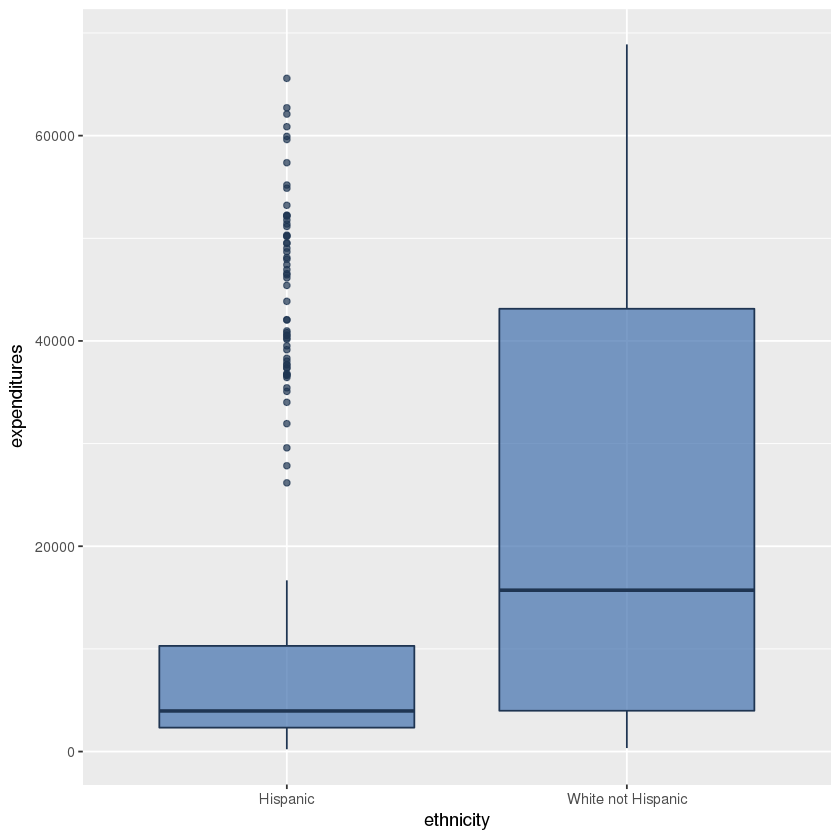

In [74]:
ggplot(data=dds.discr.sub,aes(x=ethnicity, y=expenditures))+
    geom_boxplot(fill = "#4271AE", colour = "#1F3552", alpha = 0.7)

In [75]:
dds.discr.sub %>% 
    group_by(ethnicity) %>%
    summarize(min=min(expenditures), max=max(expenditures), q1=quantile(expenditures,p=.25), q3=quantile(expenditures,p=.75),
             mean=mean(expenditures),median=median(expenditures))

ethnicity,min,max,q1,q3,mean,median
Hispanic,222,65581,2331.25,10292.5,11065.57,3952
White not Hispanic,340,68890,3977.00,43134.0,24697.55,15718


Most Hispanic consumers receive between \$0 to \$20,000 from the California DDS; individuals receiving amounts higher than this are upper outliers. However, for White non-Hispanic consumers, median expenditures is at \$15,718, and the middle 50% of consumers receive between \$4,000 and \$43,000. The mean expenditures for Hispanic consumers is \$11,066, while the mean expenditures for White non-Hispanic consumers is over twice as high at \$24,698. On average, a Hispanic consumer receives less financial support from the California DDS than a White non-Hispanic consumer.

b) Recall that expenditures is strongly associated with age - older individuals tend to receive more financial support. Is there also an association between age and ethnicity, for these two ethnic groups? Examine the distribution of age within each group and describe your findings.

Note that when using data to investigate a question, it is important to explore not only how explanatory variables are related to the response variable(s), but also how explanatory variables influence each other.

#### Solution:

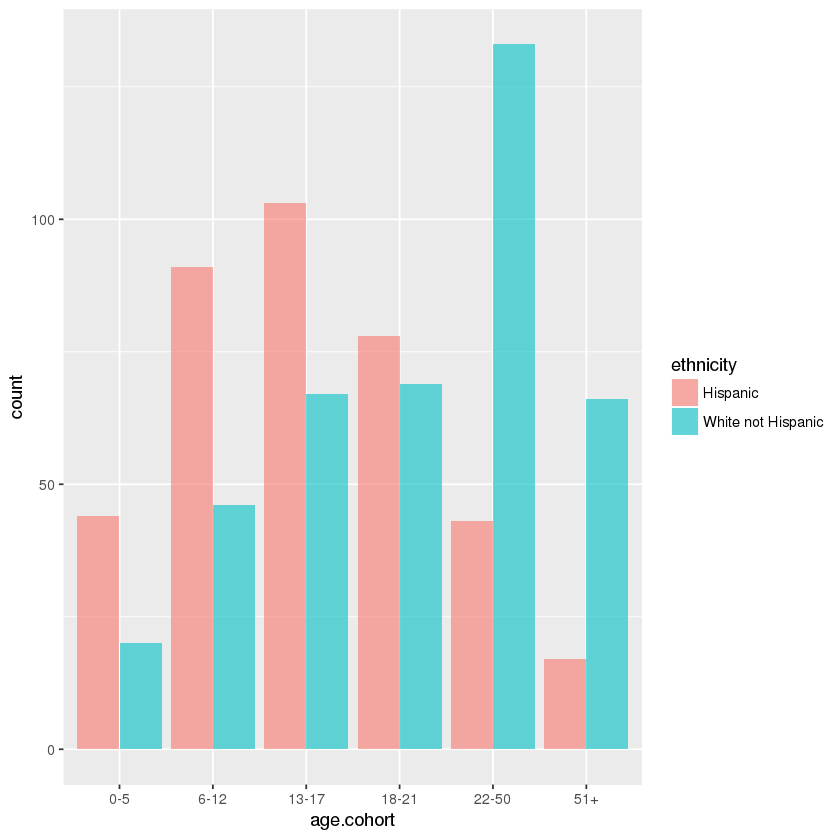

In [76]:
ggplot(data=dds.discr.sub,aes(age.cohort,fill=ethnicity)) +
    geom_bar(alpha=.6,position="dodge")

In [77]:
require(tidyr)
dds.discr.sub %>%
    count(age.cohort,ethnicity) %>%
    spread(key=ethnicity,value=n)

age.cohort,Hispanic,White not Hispanic
0-5,44,20
6-12,91,46
13-17,103,67
18-21,78,69
22-50,43,133
51+,17,66


Hispanics tend to be younger, with most Hispanic consumers falling into the 6-12, 13-17, and 18-21 age cohorts. In contrast, White non-Hispanics tend to be older; most consumers in this ethnic group are in the 22-50 age cohort, and relatively more White non-Hispanic consumers are in the 51+ age cohort as compared to Hispanics.

#### Problem 4: Confounding

Recall that a confounding variable is a variable that is associated with the response variable and the exploratory variable under consideration; confounding was initially introduced in the context of sunscreen use and the incidence of skin cancer, where sun exposure is a confounder. In this setting, age is a confounder for the relationship between `expenditures` and `ethnicity`. Just as it would be incorrect to claim that sunscreen causes skin cancer, it is essential here to recognize that there is more to the story than the apparent association between `expenditures` and `ethnicity`.

a) For a closer look at the relationship between age, ethnicity, and expenditures, compare how average `expenditures` differs by ethnicity within each age cohort. If age is indeed the primary source of the observed variation in expenditures, then there should be little difference in average `expenditures` between individuals in different ethnic groups but the same age cohort. Is this the case? Describe your findings.



#### Solution:

In [78]:
dds.discr.sub %>% 
    group_by(ethnicity,age.cohort) %>%
    summarize(mean=mean(expenditures))

ethnicity,age.cohort,mean
Hispanic,0-5,1393.205
Hispanic,6-12,2312.187
Hispanic,13-17,3955.282
Hispanic,18-21,9959.846
Hispanic,22-50,40924.116
Hispanic,51+,55585.000
White not Hispanic,0-5,1366.900
White not Hispanic,6-12,2052.261
White not Hispanic,13-17,3904.358
White not Hispanic,18-21,10133.058


When expenditures is compared within age cohorts, there are not large differences between mean expenditures for White non-Hispanics versus Hispanics. Comparing individuals of similar ages reveals that the association between ethnicity and expenditures is not nearly as strong as it seemed from the initial comparison of overall averages.

b) Based on this exploratory analysis, does there seem to be evidence of ethnic discrimination in the amount of financial support provided by the California DDS? Summarize your findings in language accessible to a non-statistician.

#### Solution:

There does not seem to be evidence of ethnic discrimination. Although the average annual expenditures is lower for Hispanics than for White non-Hispanics, this is due to the difference in age distributions between the two ethnic groups. The population of Hispanic consumers is relatively young compared to the population of White non-Hispanic consumers, and the amount of expenditures for younger consumers tends to be lower than for older consumers. When individuals of similar ages are compared, there are not large differences in the average amount of financial support provided to a Hispanic consumer versus a White non-Hispanic consumer.


#### BONUS (Extra Credit) Problem: Simpsons' Paradox

Identifying confounding variables is essential for understanding data. Confounders are often context-specific; for example, age is not necessarily a confounder for the relationship between ethnicity and expenditures in a different population. Additionally, it is rarely immediately obvious which variables in a dataset are confounders; looking for confounding variables is an integral part of exploring a dataset.

These data represent an extreme example of confounding known as **Simpson's paradox**, in which an association observed in several groups may disappear or reverse direction once the groups are combined. In other words, an association between two variables *X* and *Y* may disappear or reverse direction once data are partitioned into subpopulations based on a third variable *Z*, the confounding variable.

Mean `expenditures` is higher for Hispanics than White non-Hispanics in all age cohorts except one. Yet, once all the data are aggregated, the average expenditures for White non-Hispanics is over twice as large as the average for Hispanics. This paradox can be explored from a mathematical perspective by using weighted averages, where the average expenditure for each cohort is weighted by the proportion of the population in that cohort.

Calculate the overall weighted average expenditures for Hispanics and for White non-Hispanics, using the proportions of individuals in each age cohort (Problem 3d) and the average expenditures for each Cohort (Problem 4a). How does the weighting lead to overall average expenditures for White non-Hispanics to be higher than for Hispanics?

#### Solution:

In [93]:
dds.summary.Hisp = dds.discr.sub %>%
      filter(ethnicity=="Hispanic") %>%
      group_by(age.cohort) %>%
      summarise (n = n(),mean=mean(expenditures)) %>%
      mutate(freq = n / sum(n)) %>%
      mutate(mean=mean)

dds.summary.Hisp

age.cohort,n,mean,freq
0-5,44,1393.205,0.11702128
6-12,91,2312.187,0.24202128
13-17,103,3955.282,0.27393617
18-21,78,9959.846,0.20744681
22-50,43,40924.116,0.11436170
51+,17,55585.000,0.04521277


In [95]:
dds.summary.Hisp %>%
    mutate(weighted.mean = mean*freq) 

dds.summary.Hisp %>%
    mutate(weighted.mean = mean*freq) %>% 
    summarise(sum = sum(weighted.mean))

age.cohort,n,mean,freq,weighted.mean
0-5,44,1393.205,0.11702128,163.0346
6-12,91,2312.187,0.24202128,559.5984
13-17,103,3955.282,0.27393617,1083.4947
18-21,78,9959.846,0.20744681,2066.1383
22-50,43,40924.116,0.11436170,4680.1516
51+,17,55585.000,0.04521277,2513.1516


sum
11065.57


In [96]:
dds.summary.White = dds.discr.sub %>%
      filter(ethnicity=="White not Hispanic") %>%
      group_by(age.cohort) %>%
      summarise (n = n(),mean=mean(expenditures)) %>%
      mutate(freq = n / sum(n)) %>%
      mutate(mean=mean)

dds.summary.White

age.cohort,n,mean,freq
0-5,20,1366.900,0.04987531
6-12,46,2052.261,0.11471322
13-17,67,3904.358,0.16708229
18-21,69,10133.058,0.17206983
22-50,133,40187.624,0.33167082
51+,66,52670.424,0.16458853


In [97]:
dds.summary.White %>%
    mutate(weighted.mean = mean*freq)

dds.summary.White %>%
    mutate(weighted.mean = mean*freq) %>% 
    summarise(sum = sum(weighted.mean))

age.cohort,n,mean,freq,weighted.mean
0-5,20,1366.900,0.04987531,68.17456
6-12,46,2052.261,0.11471322,235.42145
13-17,67,3904.358,0.16708229,652.34913
18-21,69,10133.058,0.17206983,1743.59352
22-50,133,40187.624,0.33167082,13329.06234
51+,66,52670.424,0.16458853,8668.94763


sum
24697.55


The weights for the youngest four cohorts, which have lower expenditures, are higher for the Hispanic population than the White non-Hispanic population; additionally, the weights for the oldest two cohorts, which have higher expenditures, are higher for the White non-Hispanic population. This leads to overall average expenditures for the White non-Hispanics to be higher than for Hispanics.